In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [21]:
data = pd.read_csv("/home/apiiit123/house.csv")
data

Unnamed: 0          id             date   price  bedrooms  bathrooms  \
0               0  7229300521  20141013T000000  231300         2       1.00   
1               1  6414100192  20141209T000000  538000         3       2.25   
2               2  5631500400  20150225T000000  180000         2       1.00   
3               3  2487200875  20141209T000000  604000         4       3.00   
4               4  1954400510  20150218T000000  510000         3       2.00   
...           ...         ...              ...     ...       ...        ...   
21608       21608   263000018  20140521T000000  360000         3       2.50   
21609       21609  6600060120  20150223T000000  400000         4       2.50   
21610       21610  1523300141  20140623T000000  402101         2       0.75   
21611       21611   291310100  20150116T000000  400000         3       2.50   
21612       21612  1523300157  20141015T000000  325000         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0             1180      5650     1.0           0  ...      7        1180   
1             2570      7242     2.0           0  ...      7        2170   
2              770     10000     1.0           0  ...      6         770   
3             1960      5000     1.0           0  ...      7        1050   
4             1680      8080     1.0           0  ...      8        1680   
...            ...       ...     ...         ...  ...    ...         ...   
21608         1530      1131     3.0           0  ...      8        1530   
21609         2310      5813     2.0           0  ...      8        2310   
21610         1020      1350     2.0           0  ...      7        1020   
21611         1600      2388     2.0           0  ...      8        1600   
21612         1020      1076     2.0           0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[21613 rows x 22 columns]

In [22]:
data.head()

Unnamed: 0          id             date   price  bedrooms  bathrooms  \
0           0  7229300521  20141013T000000  231300         2       1.00   
1           1  6414100192  20141209T000000  538000         3       2.25   
2           2  5631500400  20150225T000000  180000         2       1.00   
3           3  2487200875  20141209T000000  604000         4       3.00   
4           4  1954400510  20150218T000000  510000         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 22 columns]

In [23]:
data.tail()

Unnamed: 0          id             date   price  bedrooms  bathrooms  \
21608       21608   263000018  20140521T000000  360000         3       2.50   
21609       21609  6600060120  20150223T000000  400000         4       2.50   
21610       21610  1523300141  20140623T000000  402101         2       0.75   
21611       21611   291310100  20150116T000000  400000         3       2.50   
21612       21612  1523300157  20141015T000000  325000         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
21608         1530      1131     3.0           0  ...      8        1530   
21609         2310      5813     2.0           0  ...      8        2310   
21610         1020      1350     2.0           0  ...      7        1020   
21611         1600      2388     2.0           0  ...      8        1600   
21612         1020      1076     2.0           0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[5 rows x 22 columns]

In [24]:
data.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  int64  
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [26]:
data.describe()

Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21613.000000  21613.000000   
mean   10806.00000  4.580306e+09  5.400886e+05      3.370795      2.114757   
std     6239.28002  2.876570e+09  3.671268e+05      0.930105      0.770163   
min        0.00000  1.000102e+06  7.500000e+04      0.000000      0.000000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.086517      0.766318   
min      290.000000  5.200000e+02      1.000000      0.000000      0.000000   
25%     1427.000000  5.040000e+03      1.000000      0.000000      0.000000   
50%     1910.000000  7.618000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.068800e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

       ...         grade    sqft_above  sqft_basement      yr_built  \
count  ...  21613.000000  21613.000000   21613.000000  21613.000000   
mean   ...      7.656873   1788.390691     291.509045   1971.005136   
std    ...      1.175459    828.090978     442.575043     29.373411   
min    ...      1.000000    290.000000       0.000000   1900.000000   
25%    ...      7.000000   1190.000000       0.000000   1951.000000   
50%    ...      7.000000   1560.000000       0.000000   1975.000000   
75%    ...      8.000000   2210.000000     560.000000   1997.000000   
max    ...     13.000000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean      84.402258  98077.939805     47.560053   -122.213896    1986.552492   
std      401.679240     53.505026      0.138564      0.140828     685.391304   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471000   -122.328000    1490.000000   
50%        0.000000  98065.000000     47.571800   -122.230000    1840.000000   
75%        0.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   21613.000000  
mean    12768.455652  
std     27304.179631  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10083.000000  
max    871200.000000  

[8 rows x 21 columns]

In [27]:
data.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [28]:
numerical = data.select_dtypes(["int","float"]).columns
categorical = data.select_dtypes(["object","category"]).columns

In [30]:
data.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [32]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')
data['year_sold'] = data['date'].dt.year
data['month_sold'] = data['date'].dt.month
data.drop('date', axis=1, inplace=True)

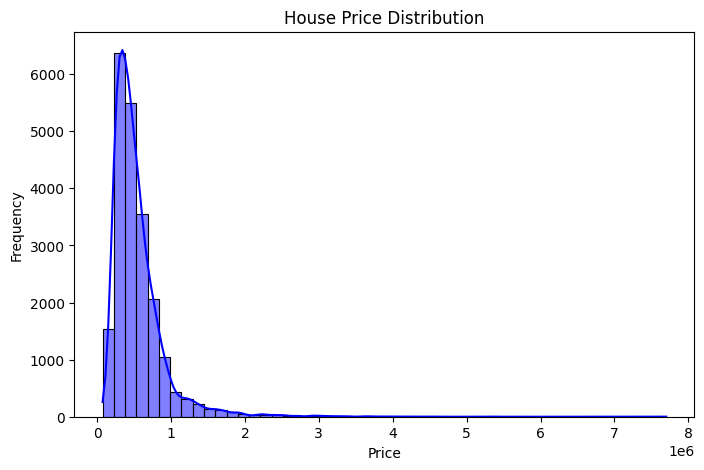

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

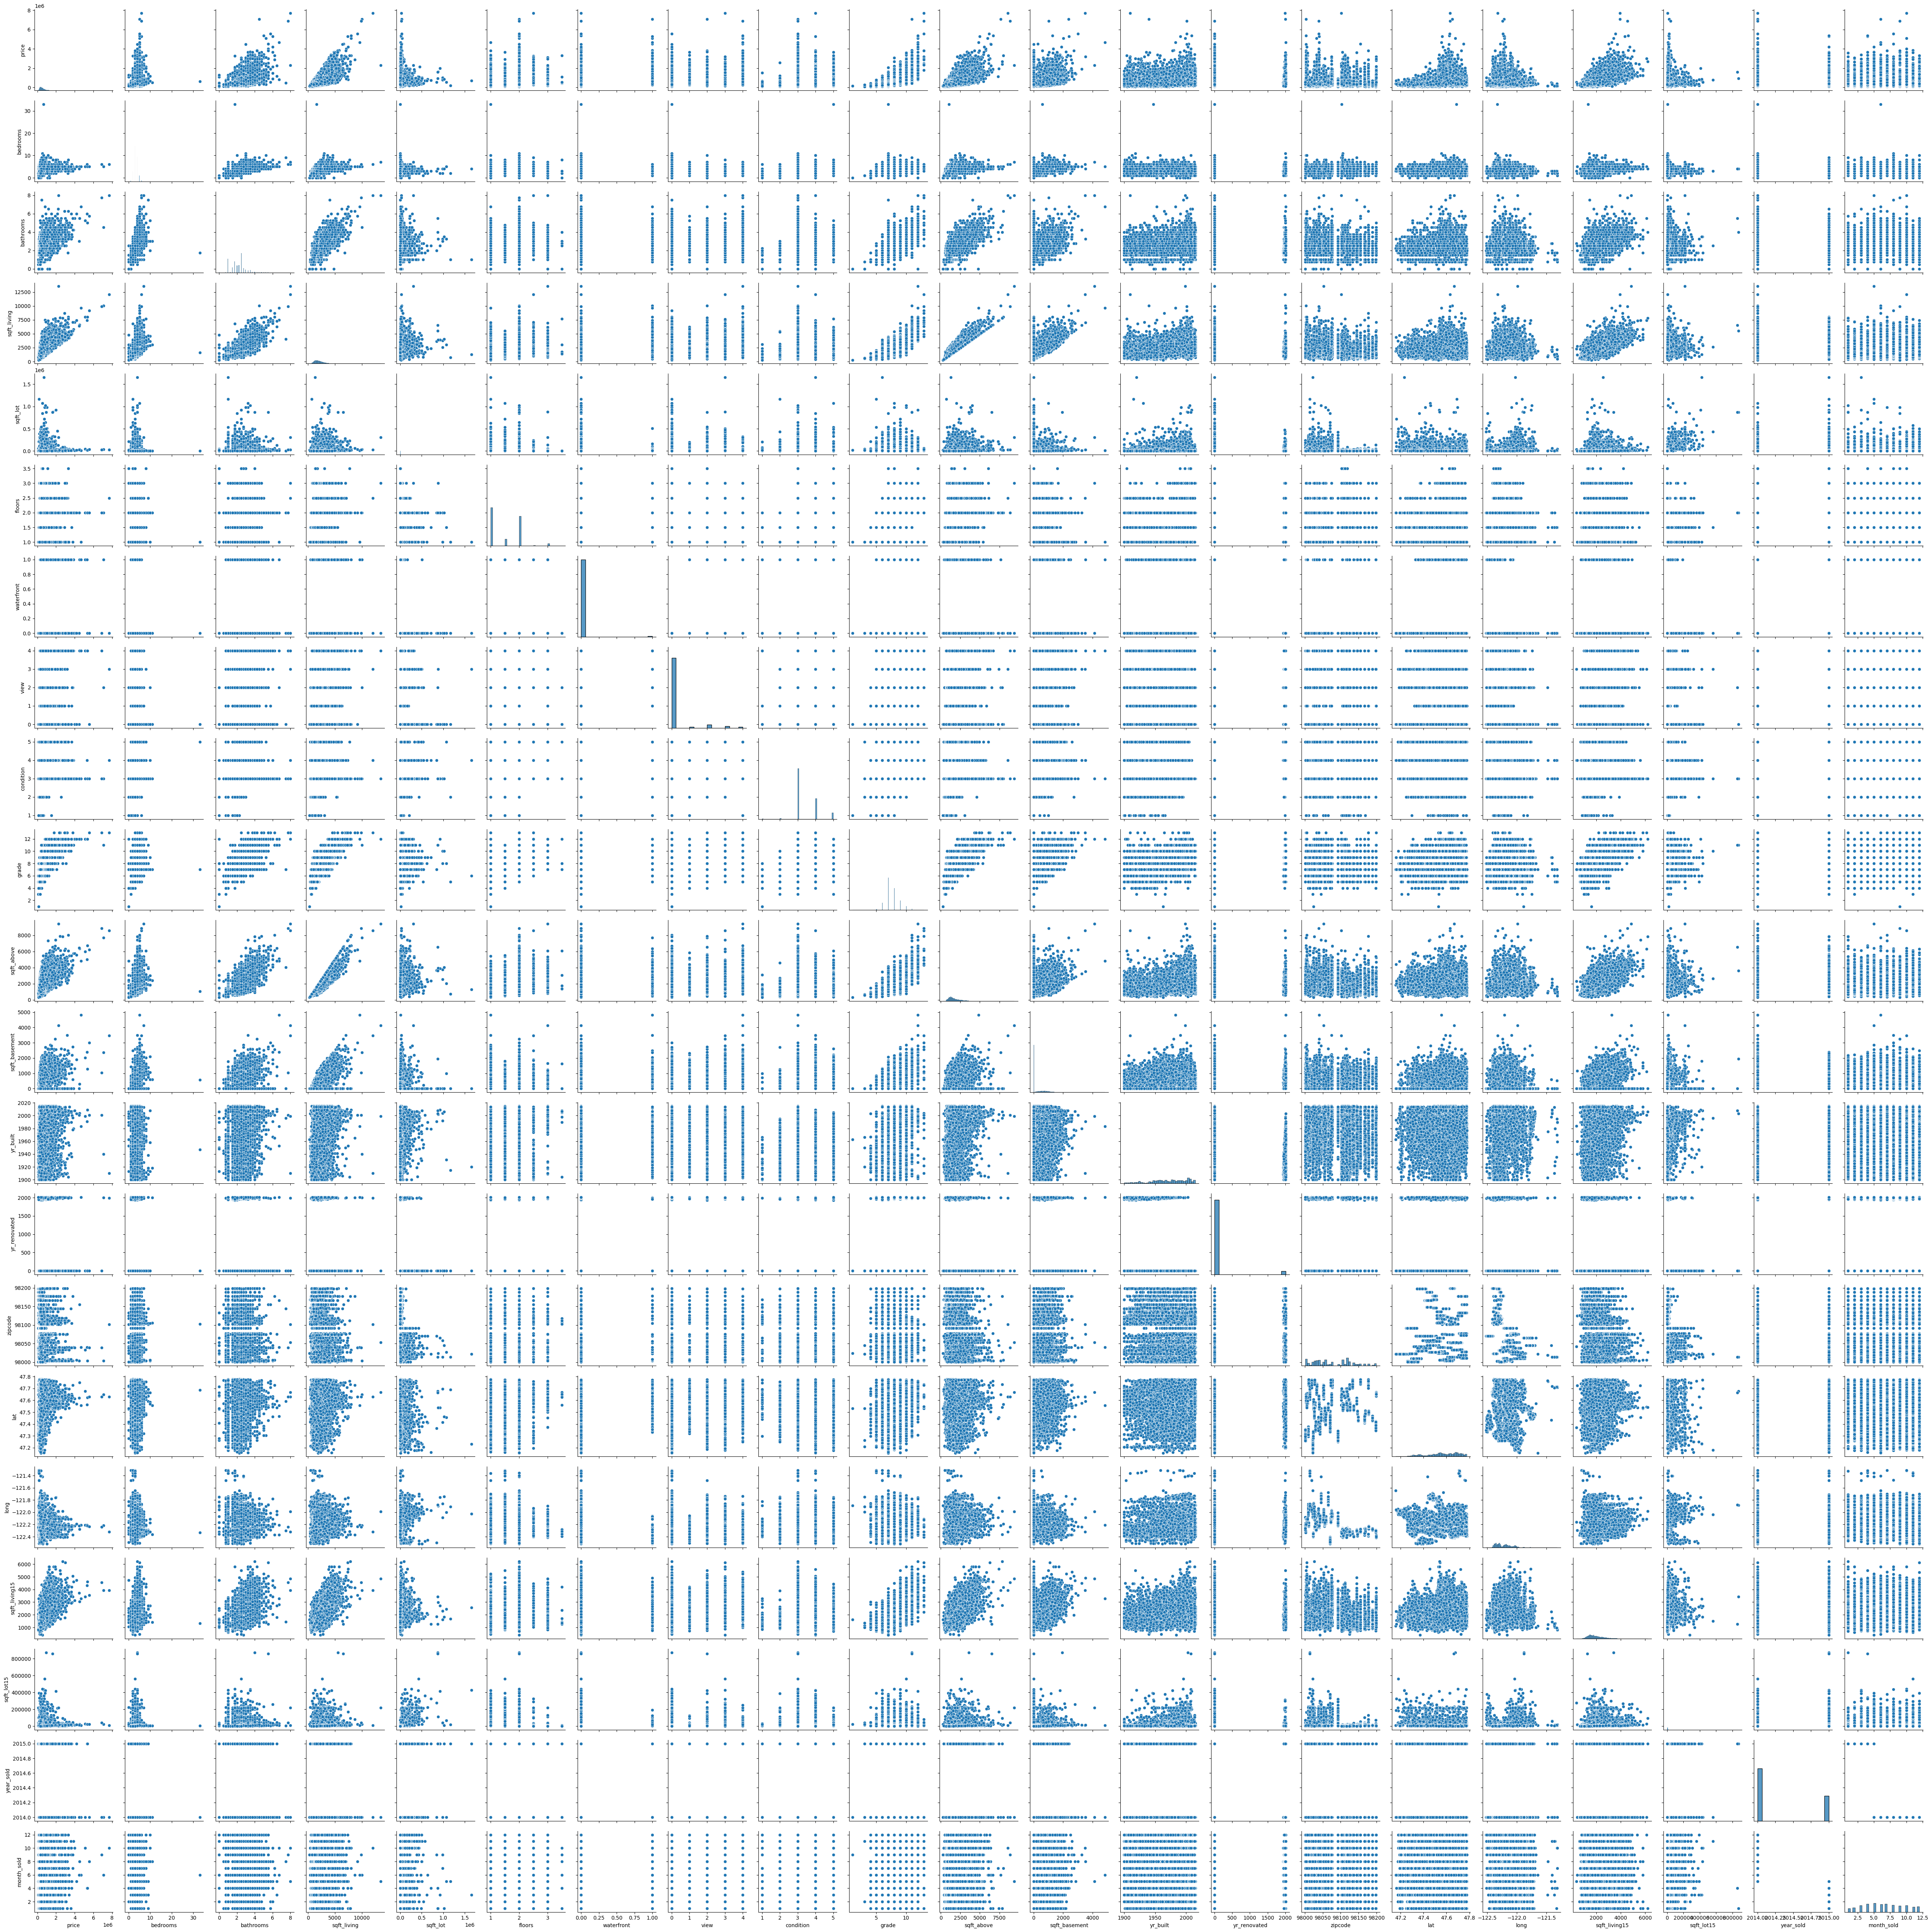

In [51]:
sns.pairplot(data)
plt.show()

In [34]:
X = data.drop('price', axis=1)
y = data['price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(X_train)
Xtest = scaler.transform(X_test)

In [38]:
model = LinearRegression()
model.fit(Xtrain, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(Xtest)

In [44]:
mae = mean_absolute_error(y_test, y_pred)

In [45]:
mse = mean_squared_error(y_test, y_pred)

In [46]:
rmse = np.sqrt(mse)

In [47]:
r2 = r2_score(y_test, y_pred)

In [48]:
print(f"""
Evaluation Metrics:
-------------------
MAE   : {mae:,.2f}
MSE   : {mse:,.2f}
RMSE  : {rmse:,.2f}
R²    : {r2:.4f}
""")



Evaluation Metrics:
-------------------
MAE   : 126,963.45
MSE   : 44,959,306,834.92
RMSE  : 212,036.10
R²    : 0.7026



In [55]:
#Feature Importance 
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

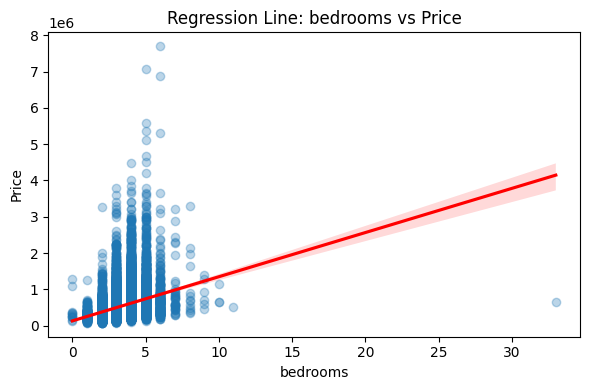

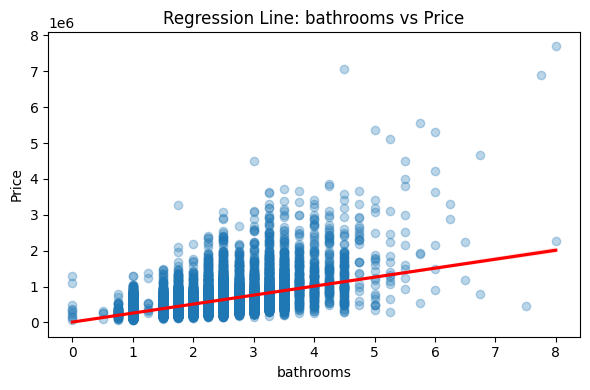

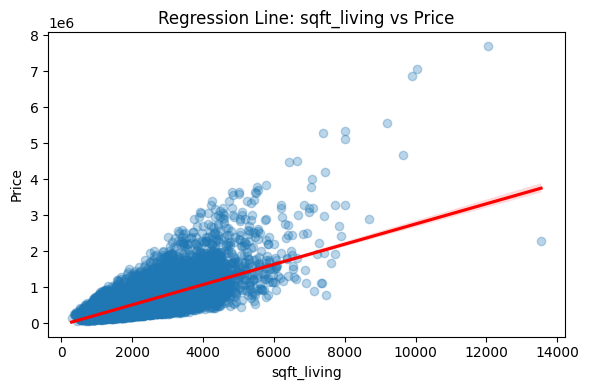

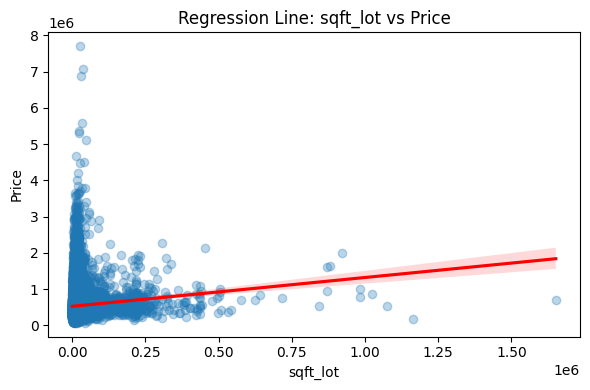

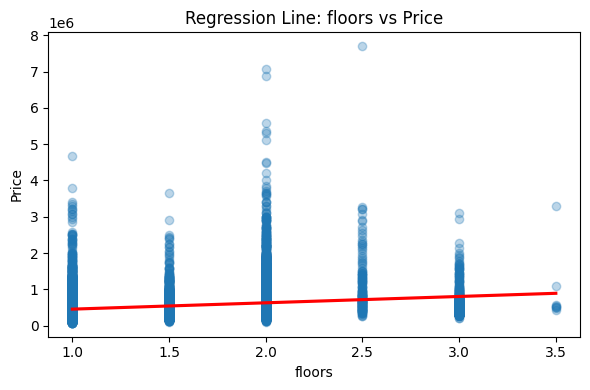

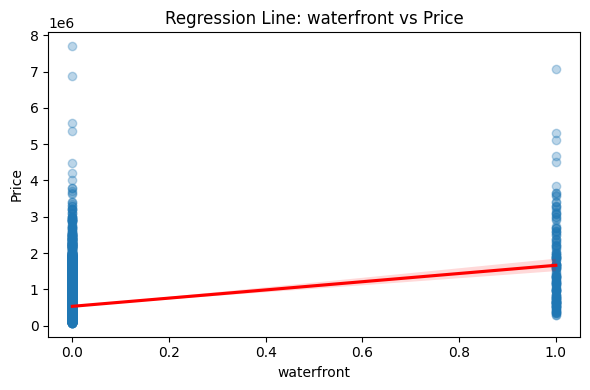

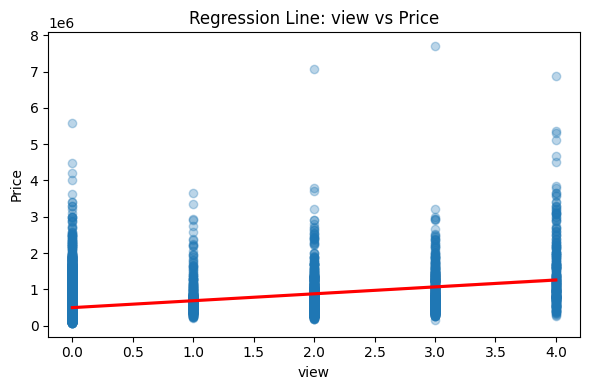

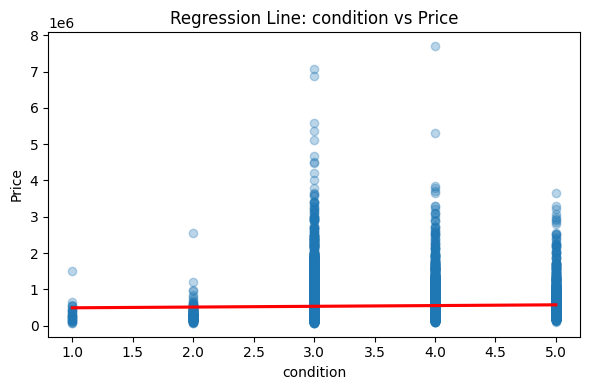

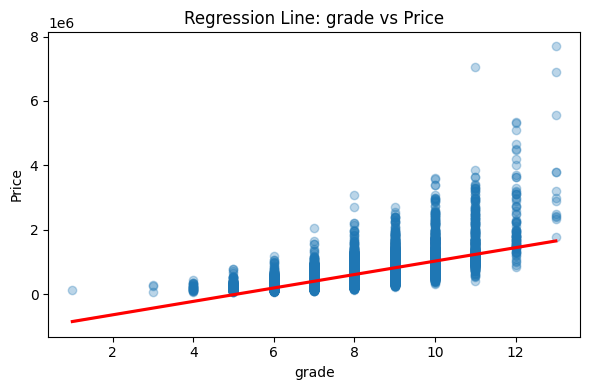

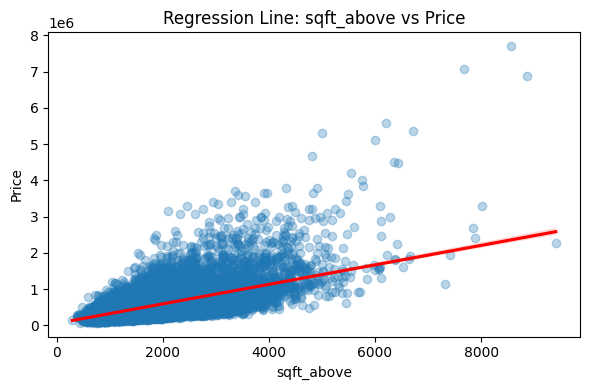

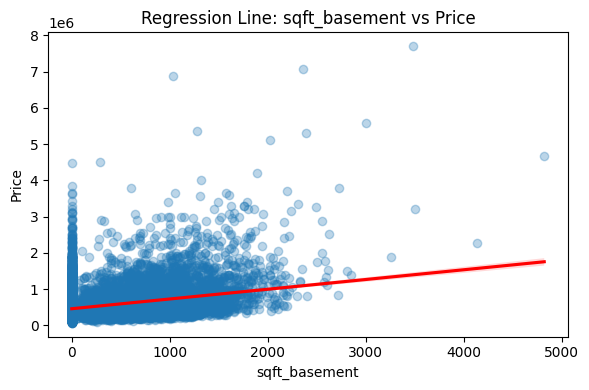

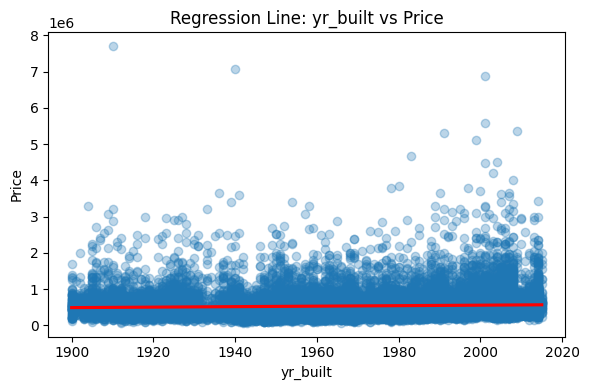

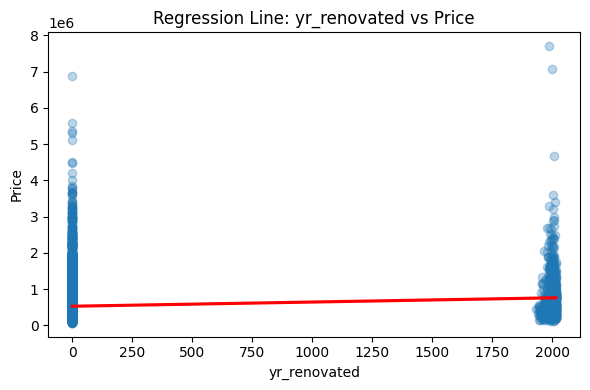

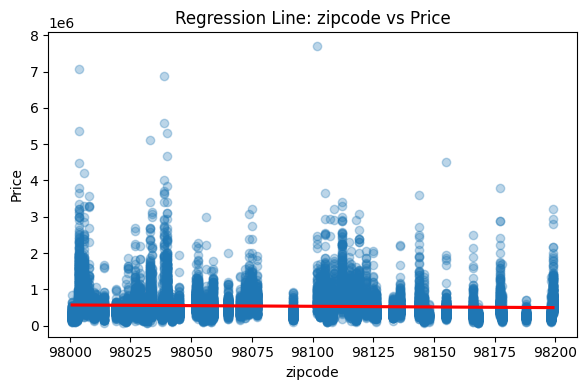

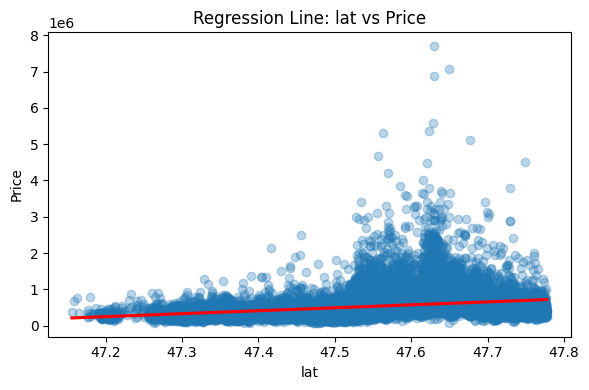

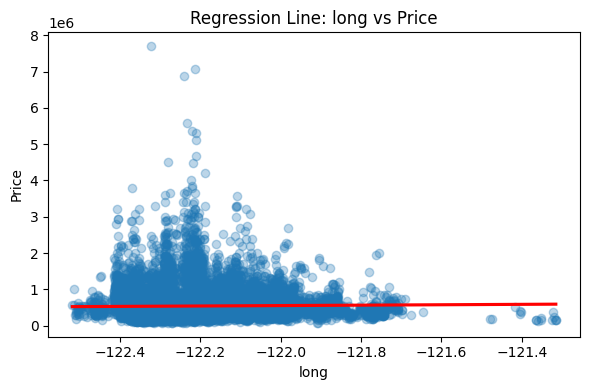

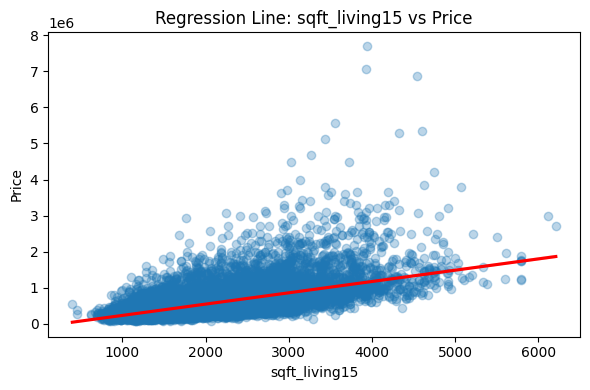

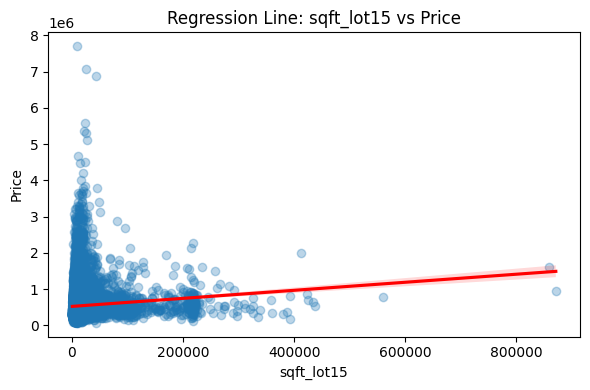

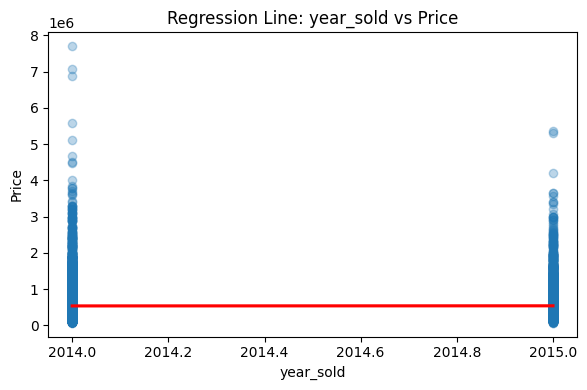

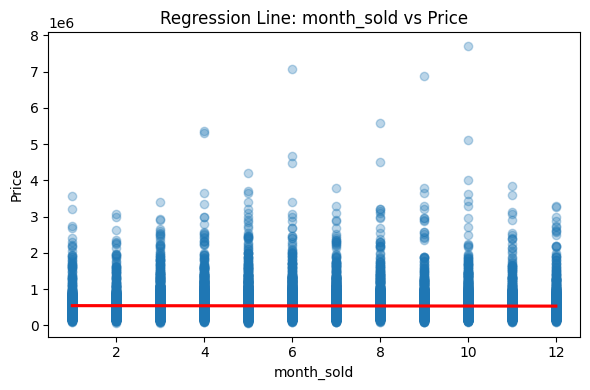

In [56]:
numeric_features = X.columns
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.regplot(x=data[col], y=data['price'],scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
    plt.title(f"Regression Line: {col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()